# Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique to reduce the dimensions of a large data set by transforming the large set of variables into a smaller one that contains most of the information in the large data set.

This is advantageous because smaller data sets are easier to explore and visualize, whch makes data analysis much easier and faster for machine learning algorithms.

If we use a PCA to transform a larger data set into a smaller data set, then PCA will:
- Tell us which variables are the most valuable for clustering the data
- Tell us how accurate the smaller data set is relative to the larger data set

### Example of PCA
<img src="images/pca/pca_1.png" height="100%" width="100%"></img>

Notice how there are 4 columns (4D), which means we cannot plot the data because visualizing 4D is impossible. Fortunately, we used PCA to resolve this issue by decreasing the dimensions.

PC1 and PC2 stand for principal component 1 and 2. The PCs are newly uncorrelated variables that compress most of the variance (information) of the data set. Since we don't know what PC1 and PC2 represent, we could guess what they are. For example, we can guess that PC1 is gender because gender may cause significant plant size variances.

### Principal Component (PC) Meaning
Let's say hypothetically we perform PCA with PC1 = 91% and PC2 = 4% as the expected variance percentages.
- PC1 (the largest variation) accounts for 91% of the variation in the data
- PC2 (the second largest variation) accounts for 4% of the variation in the data

Then we would have a 2D data set using PC1 and PC2 with 95% of the variance from the large data set!

### PCA Axes Ranking
<img src="images/pca/pca_2.png" height="50%" width="50%"></img>

Even though the PC2 (y) distance of the blue cluster to the red cluster and the PC1 (x) distance of the yellow cluster to the red cluster are the same, the variance (difference) of the red cluster and the yellow cluster is greater than the variance (difference) of the red cluster and the blue cluster.

This is because PC1 has the largest variation percentage, so clusters separated on the PC1 axis would be more prone to being variant (different) than clusters separated on the PC2 axis.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
wine_df = pd.read_csv("datasets/wine.csv")

wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# receive only the independent variables, disregard the dependent variable Customer_Segment
x = wine_df.iloc[:, 0:13].values

# receive the Customer_Segment column
y = wine_df.iloc[:, 13].values

In [4]:
# split the data set into training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [5]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the training and testing sets
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# PCA Model

In [6]:
# import the PCA model
from sklearn.decomposition import PCA

In [7]:
# create a PCA with 2 principal components
pca = PCA(n_components=2)

# fit the x_train, then transform the x_train and x_test 
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

"""
show the first 10 rows of the training set

As seen below, there are only 2 independent variables (PC1 and PC2).
"""
x_train[:10]

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344],
       [ 1.09829474,  2.22124345],
       [-2.55584748, -1.66210369],
       [ 1.85698063,  0.24157317],
       [ 2.58288576, -1.3766817 ],
       [ 0.87287612,  2.25618512],
       [-0.41838403,  2.35415681],
       [-0.30497725,  2.27659433],
       [ 2.14082532, -1.10052871]])

In [8]:
"""
the explained variance (PCs) of each principal component in descending order

PC1 equals 37.28% and PC2 equals 18.74% of the training set's variance, which is pretty good.
"""
pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

# Graph PCA
Below is a graph of the training set's columns and their eigen values for each principal component. Based on the graph of the PCA below, there seems to be 3 clusters: the middle-left, middle-bottom, and top-right.

In [9]:
# create a DataFrame using each column's eigen value per principal component
reduced_wine_df = pd.DataFrame(
    pca.components_,
    columns=wine_df.iloc[:, 0:13].columns,
    index=["PC1", "PC2"]
)

reduced_wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.129600,-0.244641,-0.010189,-0.240516,0.126495,0.389441,0.427578,-0.305057,0.307753,-0.110272,0.307105,0.376362,0.281109
PC2,-0.498073,-0.231685,-0.314969,0.023218,-0.258420,-0.100685,-0.020980,-0.039906,-0.067460,-0.530871,0.271617,0.160712,-0.365473


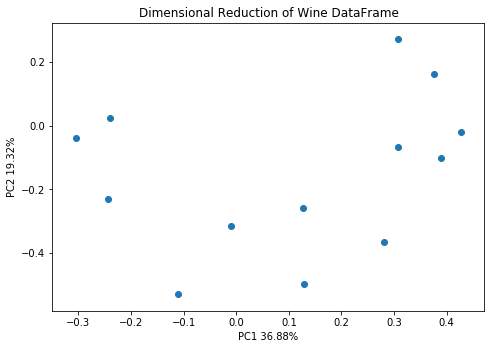

In [10]:
# create a blank plot figure
figure = plt.figure()

# add the graph's axes with their aspect ratios
axes = figure.add_axes([1, 1, 1, 1])

# set the PC1 and PC2 labels on the axes
rounded_pc1 = str(round(pca.explained_variance_ratio_[0] * 100, 2))
rounded_pc2 = str(round(pca.explained_variance_ratio_[1] * 100, 2))
axes.set_xlabel("PC1 " + rounded_pc1 + "%")
axes.set_ylabel("PC2 " + rounded_pc2 + "%")

# set the title
axes.set_title("Dimensional Reduction of Wine DataFrame")

# scatter plot the PC1 (x-axis) and PC2 (y-axis)
axes.scatter(x=reduced_wine_df.loc["PC1"], y=reduced_wine_df.loc["PC2"])

# Logistic Regression Model
Let's use a logistic regression model on the transformed data set from the PCA, and let's see how well the model predicts the test set.

In [11]:
# import the logistic regression class
from sklearn.linear_model import LogisticRegression

In [12]:
# create a logistic regression classifier with a random state (seed) of 0, then fit to training set
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# predict x_test
y_pred = classifier.predict(x_test)

y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

# Confusion Matrix
Let's create a confusion matrix for the logistic regression model. The matrix will be of size 3x3 because there are 3 values in the y_pred Array: 1, 2, or 3.

Based on the confusion matrix, we received 35 correct predictions and 1 incorrect prediction, so the accuracy of the model is ~97%. This high accuracy is probably because there are now only 2 independent variables (PC1 and PC2) that explain the majority variance of the data set. Hence, those 2 principal components became great predictors for the model.

In [14]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix

In [15]:
# create a confusion matrix that compares the y_test (actual) to the y_pred (prediction)
cm = confusion_matrix(y_test, y_pred)

"""
Read the Confusion Matrix diagonally:
14 + 15 + 6 = 35 correct predictions
0 + 0 + 1 + 0 + 0 + 0 = 1 incorrect predictions
"""
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

# Visualization of Results

In [17]:
# import a listed color map
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


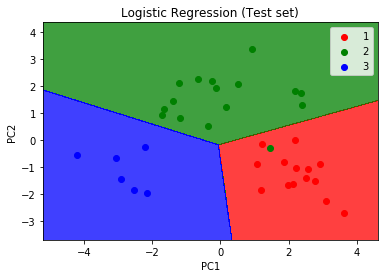

In [21]:
# create a red (Purchased) and green (Not Purchased) separation at the classifier's threshold
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# scatter each data point from the training set: red = Purchased, green = Not Purchased
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# add labels (the axes are the two independent variables), then show the graph  
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()